In [140]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [141]:
data = pd.read_csv('data/data.csv')

In [142]:
data.shape

(11914, 16)

In [143]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


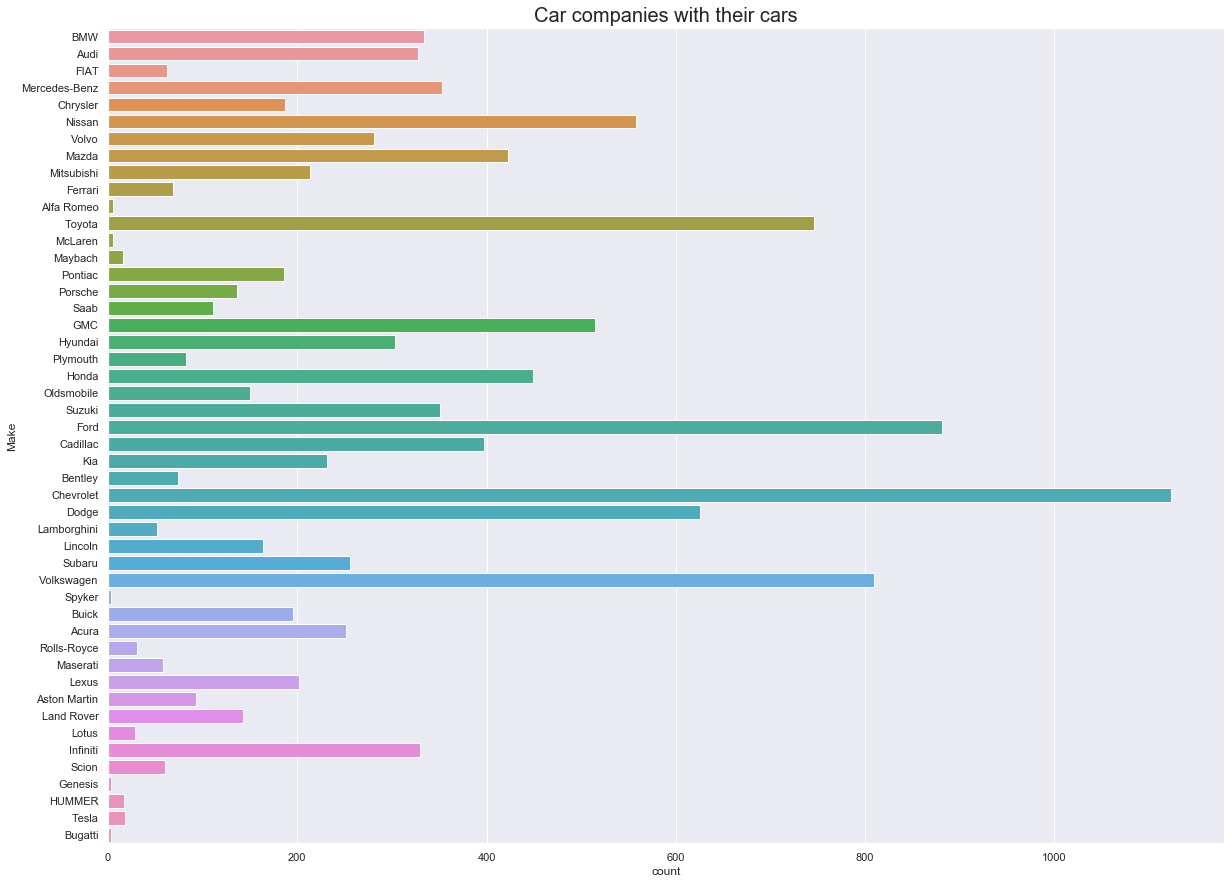

In [144]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

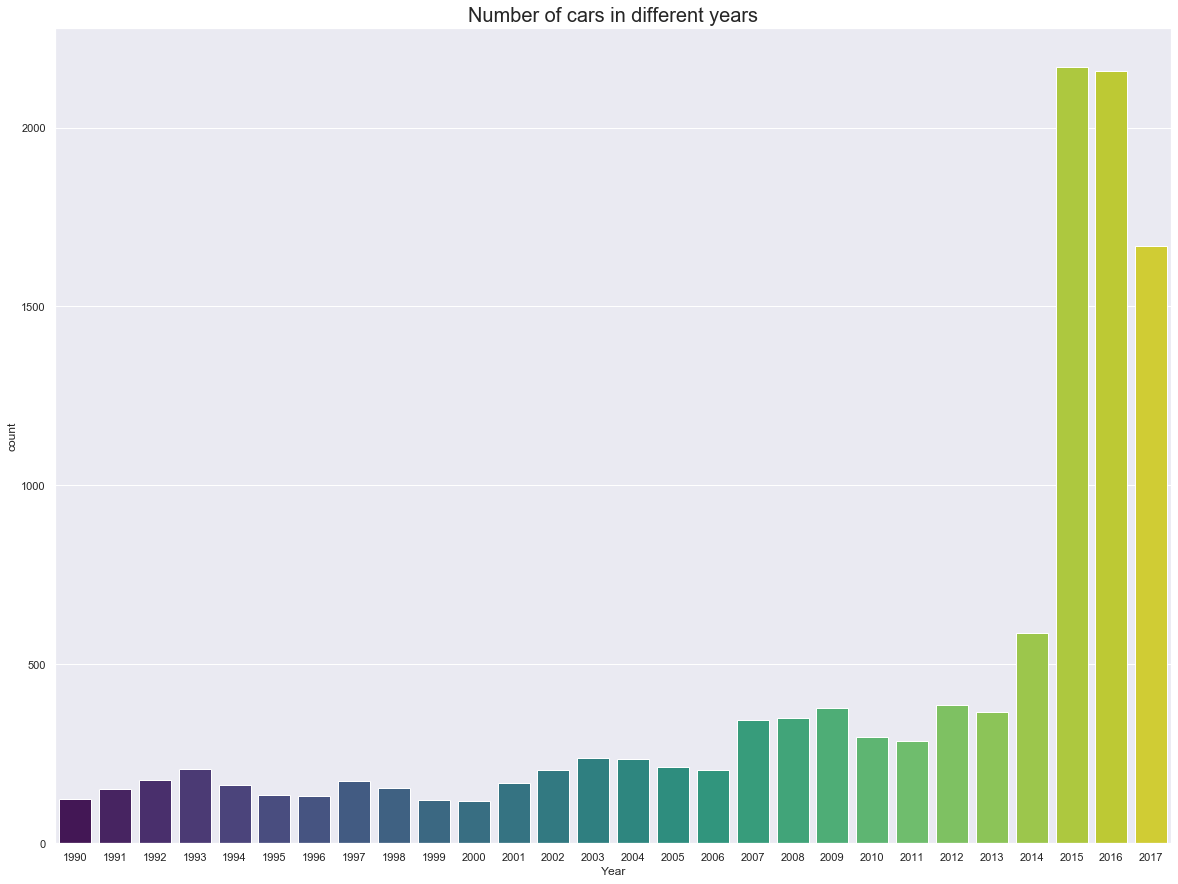

In [155]:
plt.figure(figsize = (20, 15))
sns.countplot(data.Year, palette = 'viridis')
plt.title("Number of cars in different years", fontsize = 20)
plt.show()

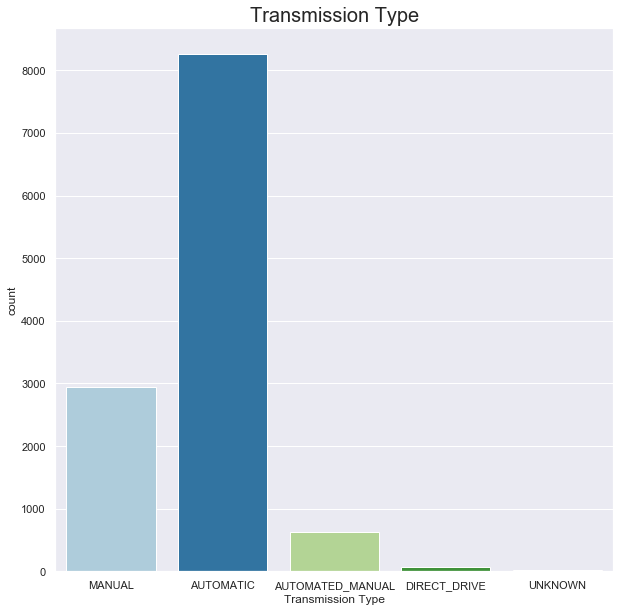

In [157]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

In [158]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [159]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [160]:
data.groupby('Make')[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']].agg(['min', 'max', 'mean'])

Engine HP                      Engine Cylinders        \
                    min     max         mean              min   max   
Make                                                                  
Acura             111.0   573.0   244.797619              4.0   6.0   
Alfa Romeo        237.0   237.0   237.000000              4.0   4.0   
Aston Martin      420.0   568.0   484.322581              8.0  12.0   
Audi              108.0   610.0   277.695122              4.0  12.0   
BMW               170.0   600.0   326.907186              0.0  12.0   
Bentley           400.0   631.0   533.851351              8.0  12.0   
Bugatti          1001.0  1001.0  1001.000000             16.0  16.0   
Buick             138.0   310.0   219.244898              4.0   8.0   
Cadillac          140.0   640.0   332.309824              4.0   8.0   
Chevrolet          55.0   650.0   246.972247              0.0   8.0   
Chrysler          100.0   385.0   229.139037              4.0   8.0   
Dodge              92.0   707.0   244.415335              4.0  10.0   
FIAT              101.0   180.0   143.559322              0.0   4.0   
Ferrari           400.0   731.0   511.956522              8.0  12.0   
Ford               63.0   662.0   243.097926              0.0   8.0   
GMC               105.0   420.0   259.844660              4.0   8.0   
Genesis           311.0   420.0   347.333333              6.0   8.0   
HUMMER            239.0   300.0   261.235294              5.0   8.0   
Honda              62.0   280.0   195.749441              0.0   6.0   
Hyundai            81.0   429.0   201.917492              4.0   8.0   
Infiniti          145.0   420.0   310.066667              4.0   8.0   
Kia               125.0   420.0   206.827434              0.0   8.0   
Lamborghini       550.0   750.0   614.076923             10.0  12.0   
Land Rover        174.0   550.0   322.097902              4.0   8.0   
Lexus             134.0   552.0   277.415842              4.0  10.0   
Lincoln           188.0   380.0   284.910256              4.0   8.0   
Lotus             189.0   400.0   275.965517              4.0   8.0   
Maserati          345.0   523.0   420.793103              6.0   8.0   
Maybach           543.0   631.0   590.500000             12.0  12.0   
Mazda              82.0   274.0   171.992908              4.0   6.0   
McLaren           562.0   641.0   610.400000              8.0   8.0   
Mercedes-Benz     121.0   641.0   350.181818              0.0  12.0   
Mitsubishi         66.0   320.0   173.429245              3.0   8.0   
Nissan             90.0   600.0   239.921533              0.0   8.0   
Oldsmobile        110.0   275.0   177.466667              4.0   8.0   
Plymouth           92.0   253.0   131.560976              4.0   6.0   
Pontiac            74.0   415.0   190.295699              4.0   8.0   
Porsche           208.0   605.0   392.794118              4.0  10.0   
Rolls-Royce       322.0   624.0   487.548387              8.0  12.0   
Saab              150.0   390.0   220.522523              4.0   8.0   
Scion              94.0   200.0   154.433333              4.0   4.0   
Spyker            400.0   400.0   400.000000              8.0   8.0   
Subaru             66.0   305.0   197.308594              3.0   6.0   
Suzuki             66.0   261.0   160.287749              4.0   6.0   
Tesla               NaN     NaN          NaN              0.0   0.0   
Toyota             93.0   381.0   236.147849              0.0   8.0   
Volkswagen         81.0   444.0   189.757726              4.0  12.0   
Volvo             114.0   345.0   230.971530              4.0   6.0   

                         highway MPG                 city mpg                  
                    mean         min  max       mean      min  max       mean  
Make                                                                           
Acura           5.333333          17   38  28.111111       13   39  19.940476  
Alfa Romeo      4.000000          34   34  34.000000       24   24  24.0

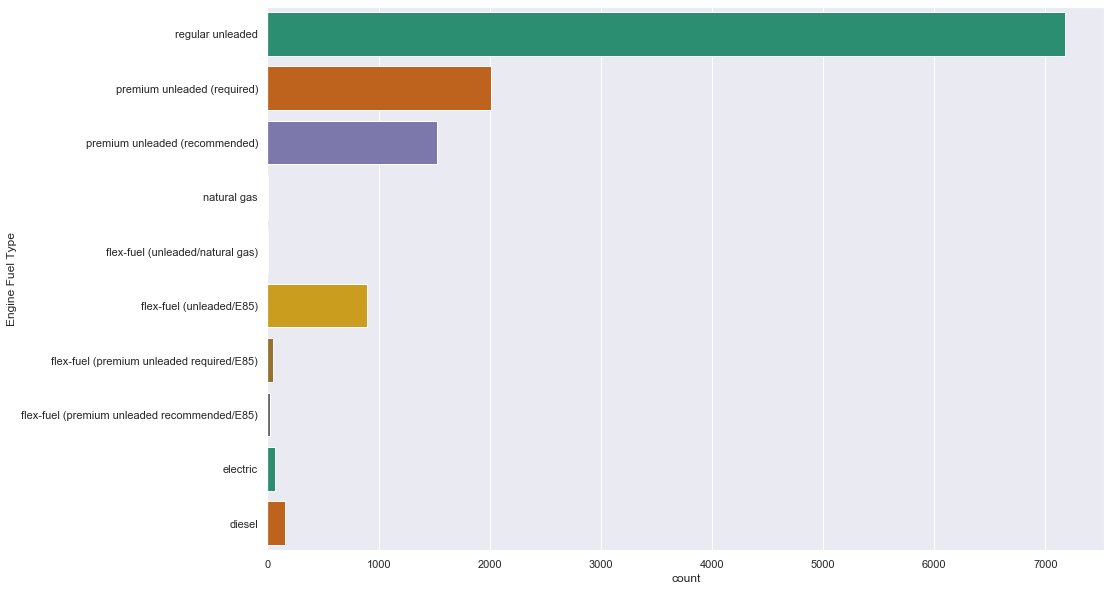

In [161]:
plt.figure(figsize = (15, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'Dark2')

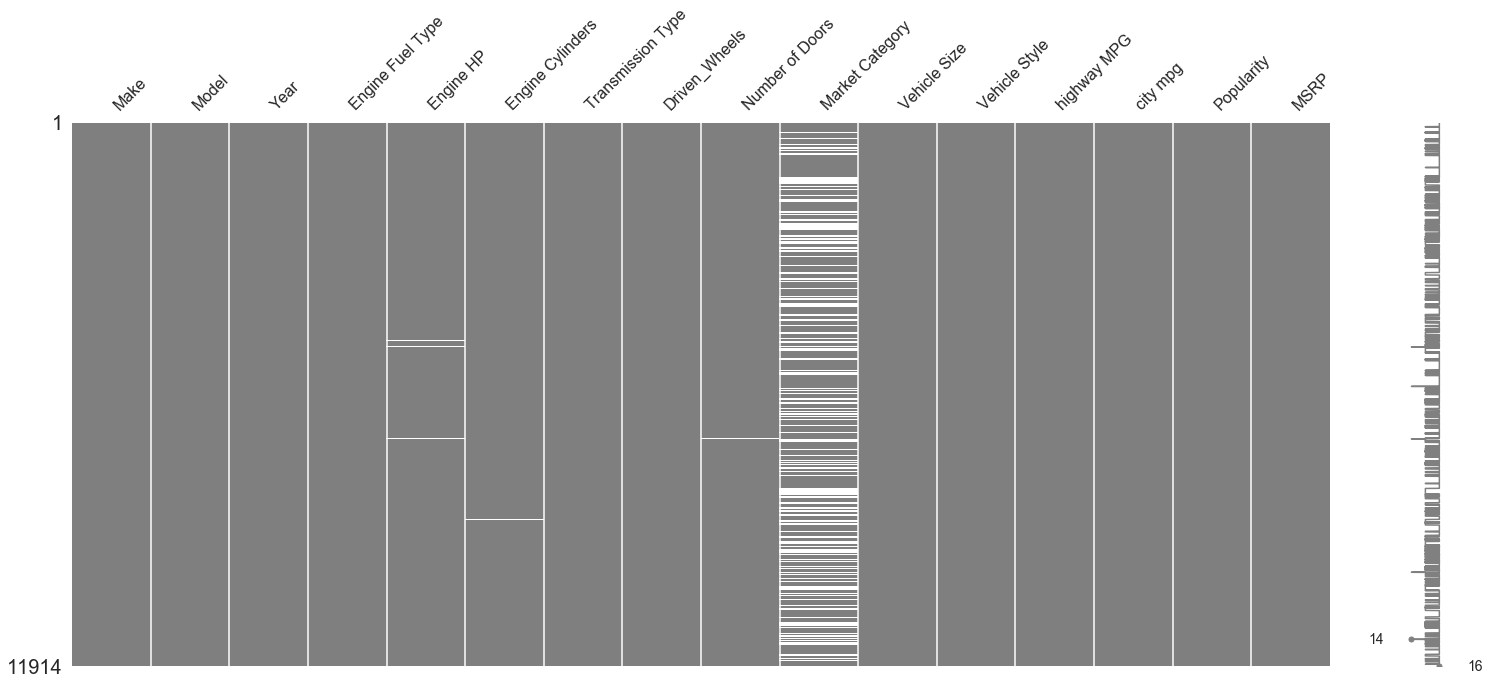

In [162]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

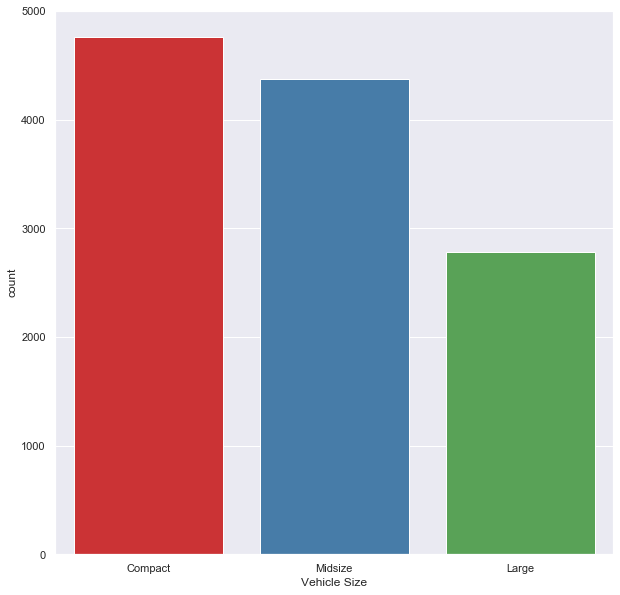

In [164]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'Set1')

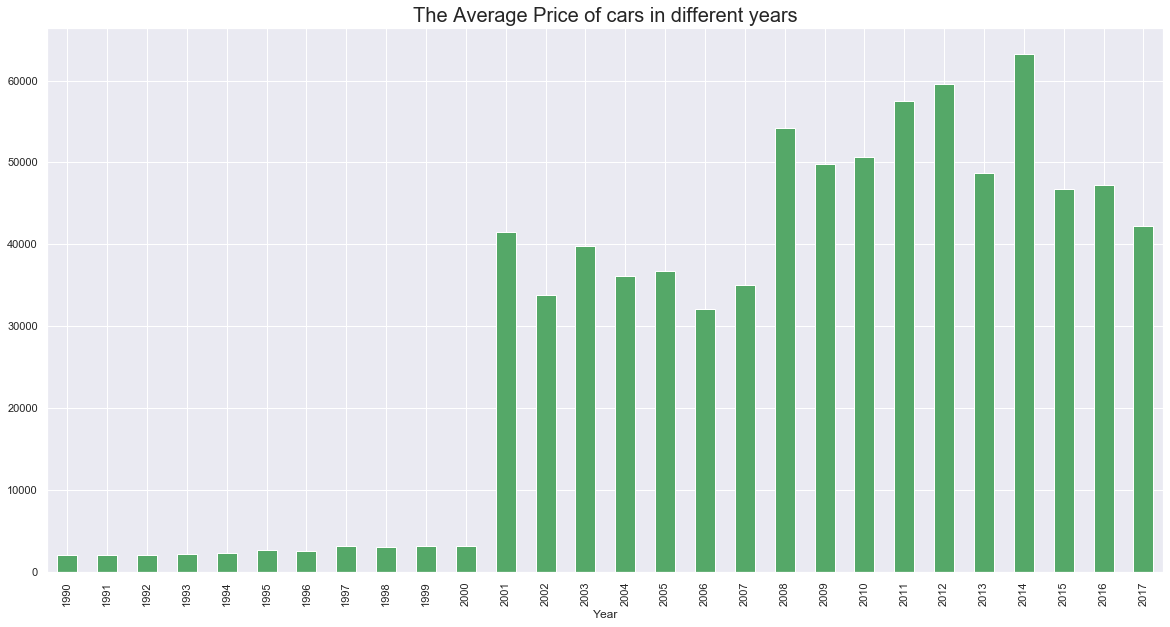

In [165]:
plt.figure(figsize = (20, 10))
data.groupby('Year')['MSRP'].mean().plot(kind = 'bar', color = 'g')
plt.title("The Average Price of cars in different years", fontsize = 20)
plt.show()


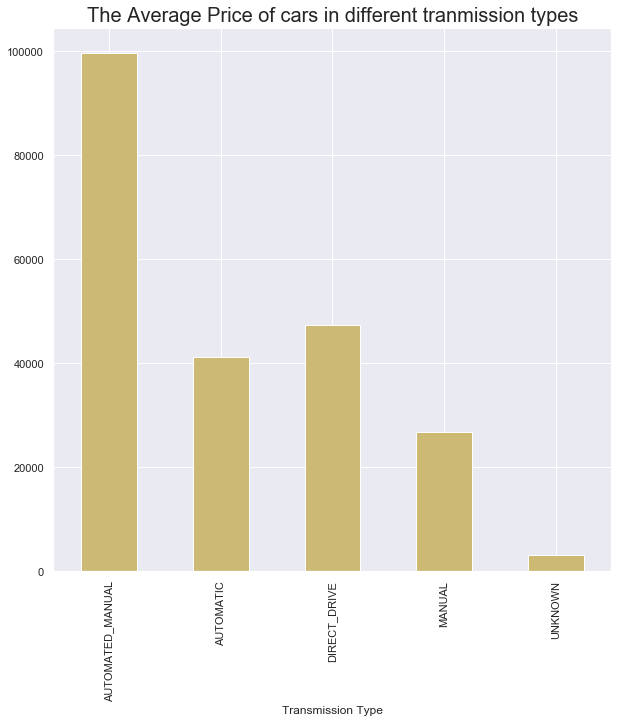

In [166]:
plt.figure(figsize = (10, 10))
data.groupby('Transmission Type')['MSRP'].mean().plot(kind = 'bar', color = 'y')
plt.title("The Average Price of cars in different tranmission types", fontsize = 20)
plt.show()


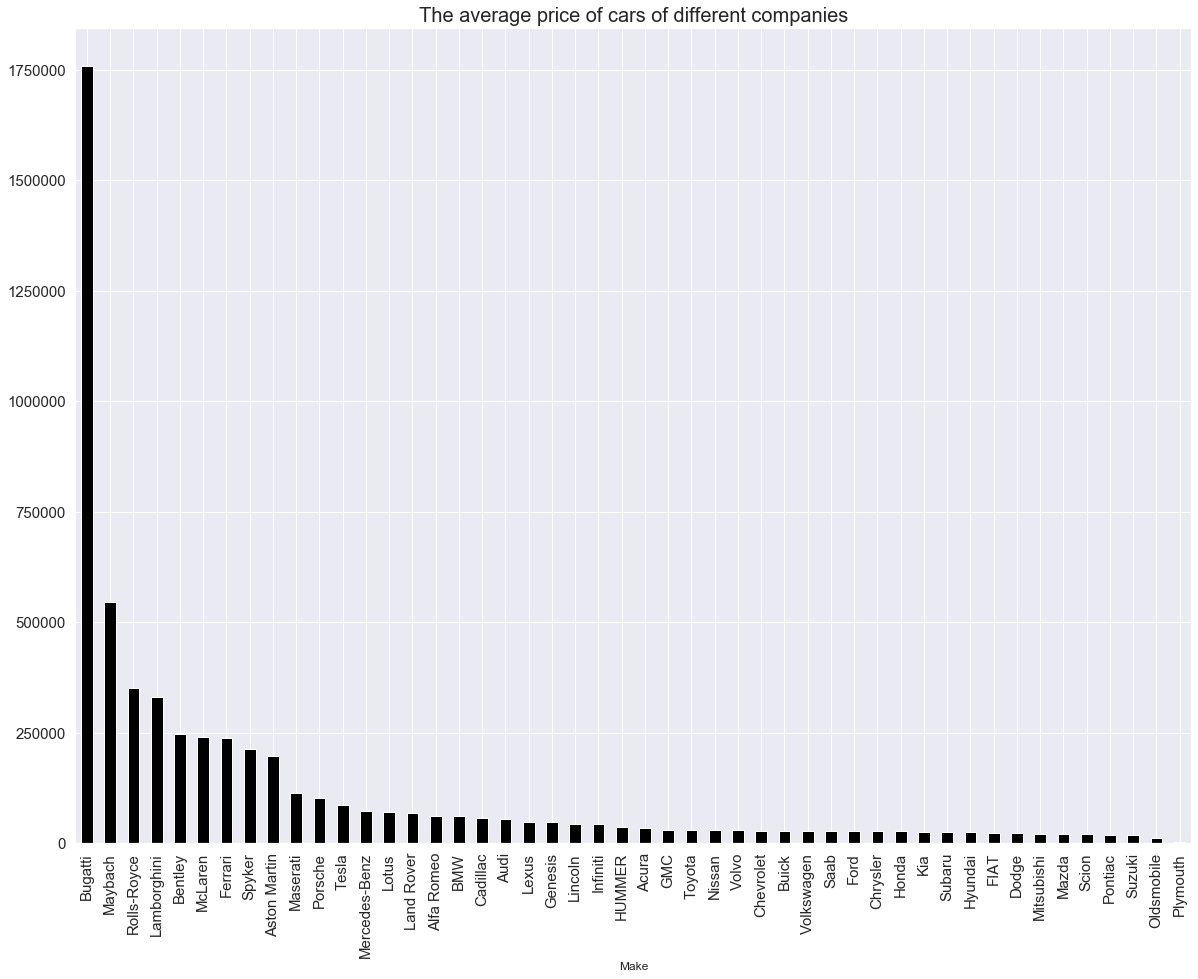

In [167]:
plt.figure(figsize = (20, 15))
data.groupby(['Make']).mean()['MSRP'].sort_values(ascending = False).plot(kind = 'bar', fontsize = 15, color = 'black')
plt.title("The average price of cars of different companies", fontsize = 20)
plt.show()


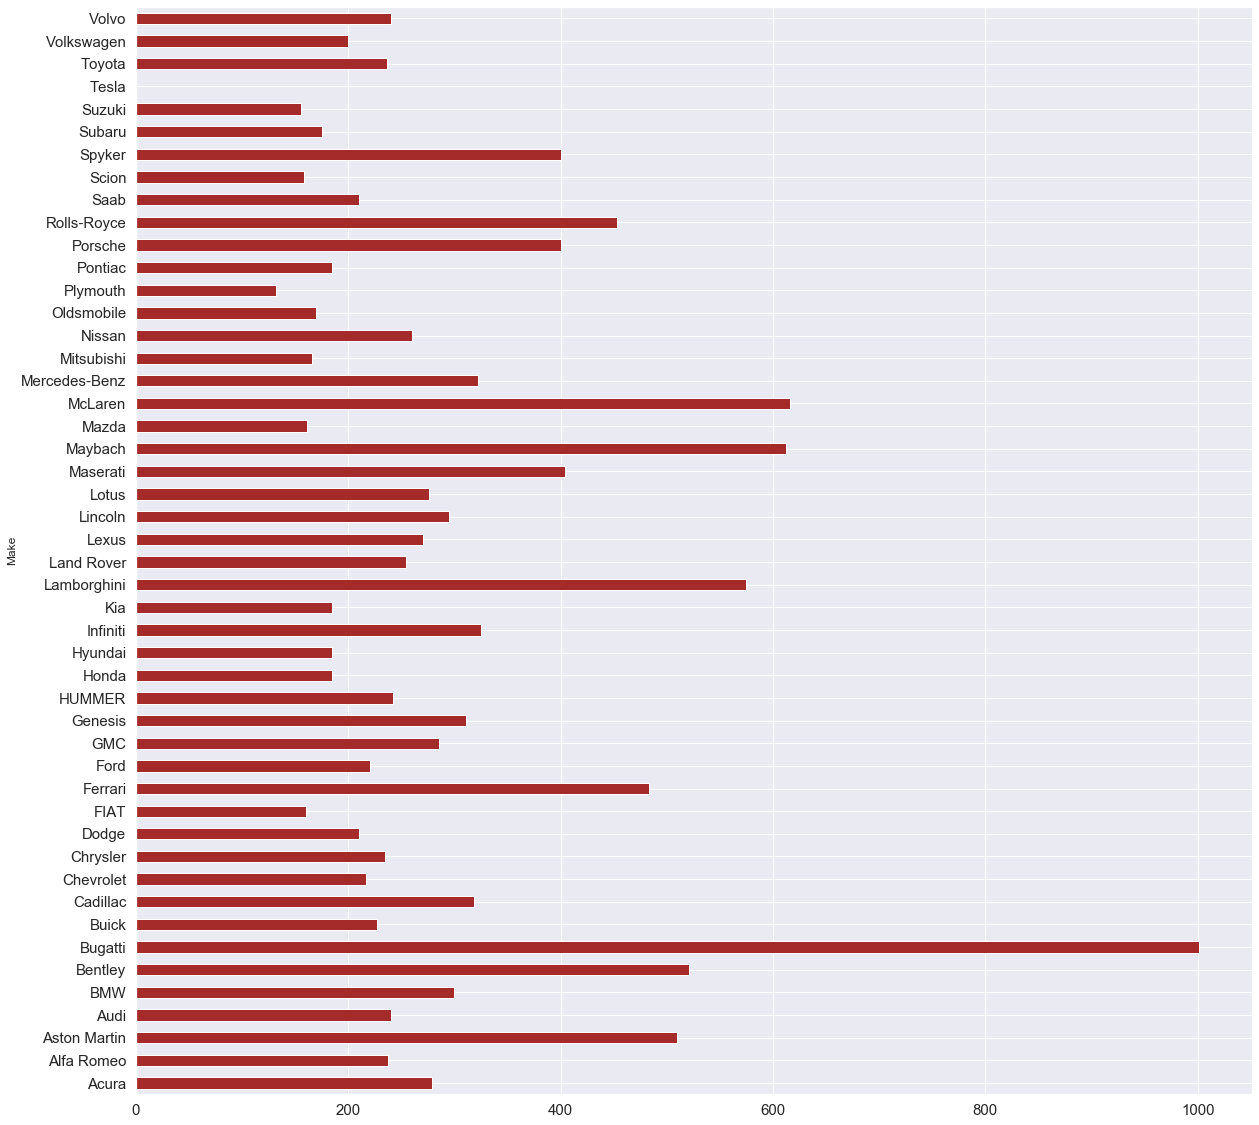

In [168]:
plt.figure(figsize = (20, 20))
data.groupby('Make').median()['Engine HP'].plot(kind = 'barh', fontsize = 15, color = 'brown')

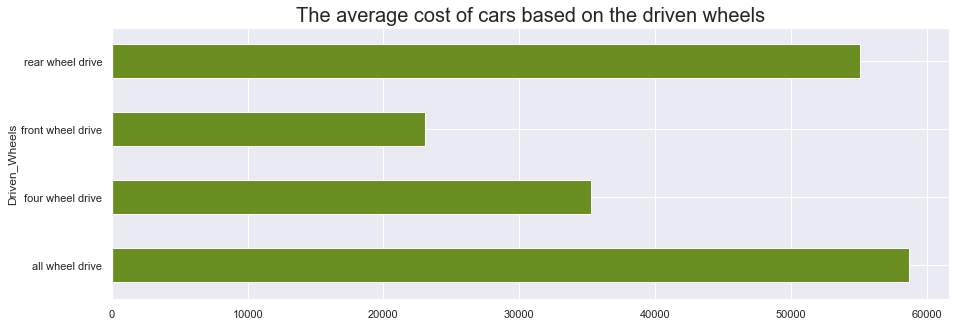

In [169]:
plt.figure(figsize = (15, 5))
data.groupby('Driven_Wheels').mean()['MSRP'].plot(kind = 'barh', color = 'olivedrab')
plt.title("The average cost of cars based on the driven wheels", fontsize= 20)
plt.show()

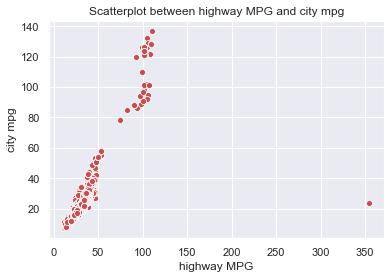

In [170]:
sns.scatterplot(x = 'highway MPG', y = 'city mpg', data = data, color = 'r')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

In [171]:
data[data['highway MPG'] > 350]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,354,24,3105,51600


In [172]:
data = data[data['highway MPG'] < 350]

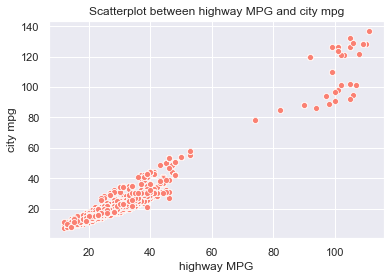

In [173]:
sns.scatterplot(x = 'highway MPG', y ='city mpg', data = data, color = 'salmon')
plt.title("Scatterplot between highway MPG and city mpg")
plt.show()

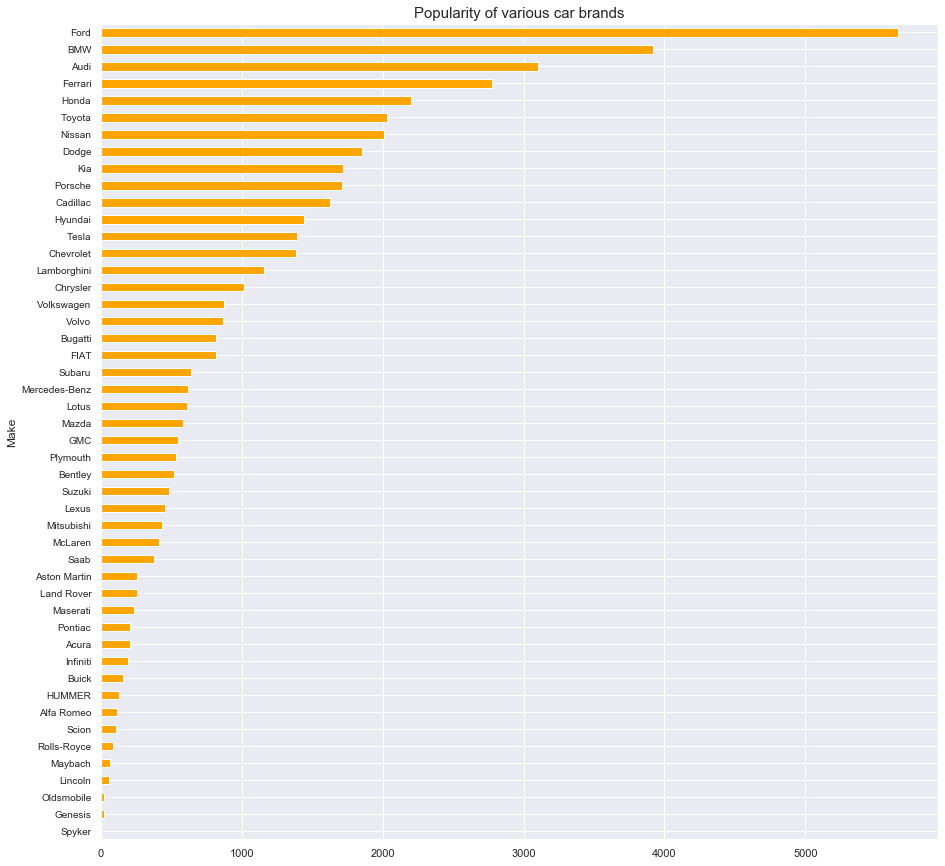

In [174]:
plt.figure(figsize = (15, 15))
data.groupby('Make').mean()['Popularity'].sort_values(ascending = True).plot(kind = 'barh', color = 'orange')
plt.yticks(fontsize = 10)
plt.title("Popularity of various car brands", fontsize = 15)
plt.show()

In [175]:
data['Market Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

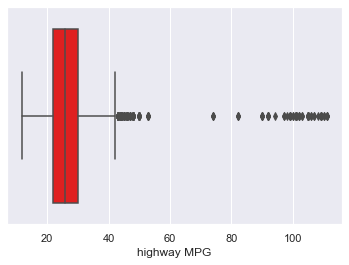

In [176]:
sns.boxplot(x = 'highway MPG', data = data, color = 'red')

In [177]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 90.0th percentile value is 35.00
The 91.0th percentile value is 36.00
The 92.0th percentile value is 36.00
The 93.0th percentile value is 37.00
The 94.0th percentile value is 37.00
The 95.0th percentile value is 38.00
The 96.0th percentile value is 39.00
The 97.0th percentile value is 40.00
The 98.0th percentile value is 42.00
The 99.0th percentile value is 46.00


In [178]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['highway MPG'], i)))

The 99.0th percentile value is 46.00
The 99.1th percentile value is 46.00
The 99.2th percentile value is 48.00
The 99.3th percentile value is 48.00
The 99.4th percentile value is 50.00
The 99.5th percentile value is 85.52
The 99.6th percentile value is 97.35
The 99.7th percentile value is 101.00
The 99.8th percentile value is 103.35
The 99.9th percentile value is 107.09


In [179]:
data = data[data['highway MPG'] < 60]

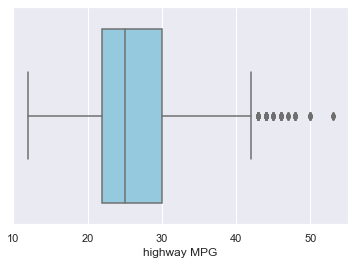

In [180]:
sns.boxplot(x = 'highway MPG', data = data, color = 'skyblue')

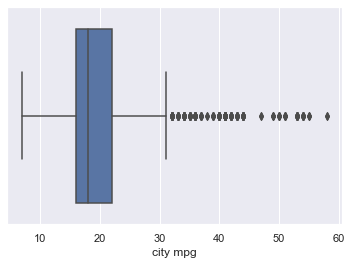

In [181]:
sns.boxplot(x = 'city mpg', data = data)

In [182]:
for i in range(90, 100):
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 90.0th percentile value is 26.00
The 91.0th percentile value is 26.00
The 92.0th percentile value is 27.00
The 93.0th percentile value is 27.00
The 94.0th percentile value is 28.00
The 95.0th percentile value is 29.00
The 96.0th percentile value is 30.00
The 97.0th percentile value is 31.00
The 98.0th percentile value is 32.00
The 99.0th percentile value is 41.00


In [183]:
for i in [x * 0.1 for x in range(990, 1000)]:
    print("The {:.1f}th percentile value is {:.2f}".format(i, np.percentile(data['city mpg'], i)))

The 99.0th percentile value is 41.00
The 99.1th percentile value is 41.00
The 99.2th percentile value is 41.00
The 99.3th percentile value is 42.00
The 99.4th percentile value is 43.00
The 99.5th percentile value is 44.00
The 99.6th percentile value is 44.00
The 99.7th percentile value is 50.00
The 99.8th percentile value is 53.00
The 99.9th percentile value is 54.00


In [184]:
data = data[data['city mpg'] < 40]

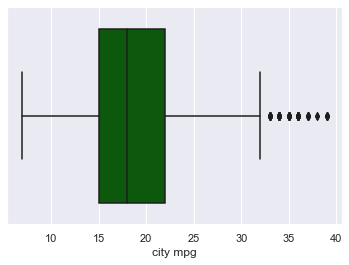

In [185]:
sns.boxplot(x = 'city mpg', data= data, color = 'darkgreen')

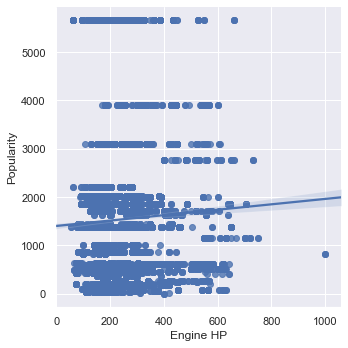

In [186]:
sns.set(rc = {'figure.figsize': (20, 20)})
sns.lmplot(x = 'Engine HP', y = 'Popularity', data = data)

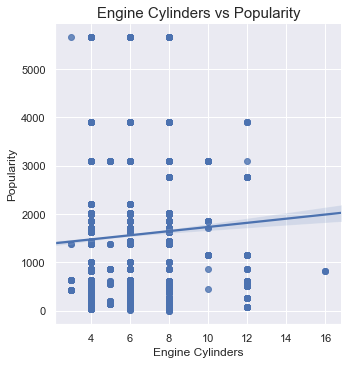

In [187]:
sns.lmplot(x = 'Engine Cylinders', y = 'Popularity', data = data)
plt.title("Engine Cylinders vs Popularity", fontsize = 15)
plt.show()

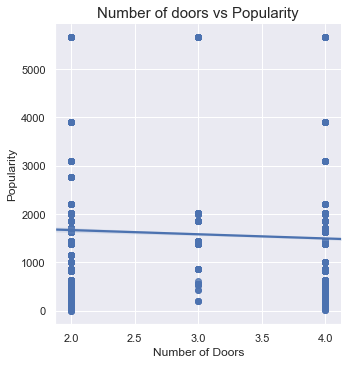

In [188]:
sns.lmplot(x = 'Number of Doors', y = 'Popularity', data = data)
plt.title("Number of doors vs Popularity", fontsize = 15)
plt.show()

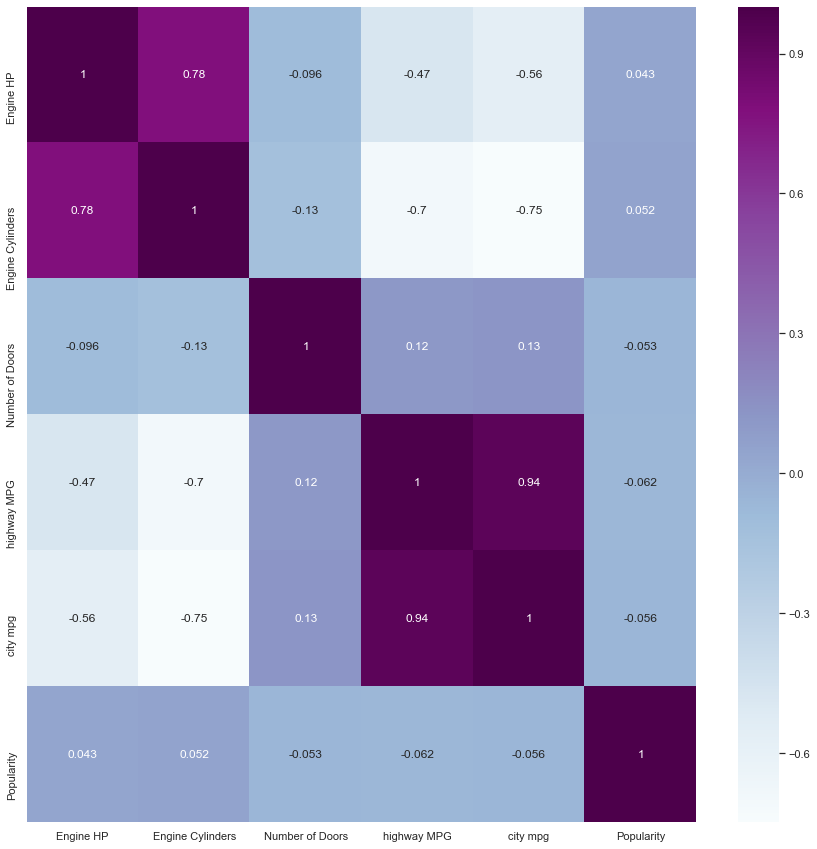

In [189]:
plt.figure(figsize = (15, 15))
numeric_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity']
heatmap_data = data[numeric_columns].corr()

sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

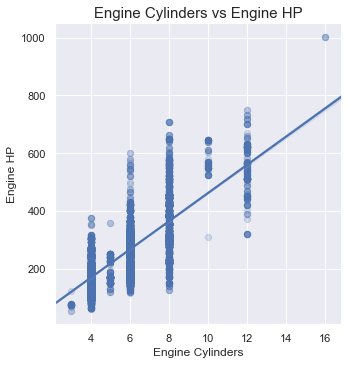

In [193]:
sns.lmplot(x = 'Engine Cylinders', y = 'Engine HP', scatter_kws = {"s": 40, "alpha": 0.2}, data = data)
plt.title("Engine Cylinders vs Engine HP", fontsize = 15)
plt.show()

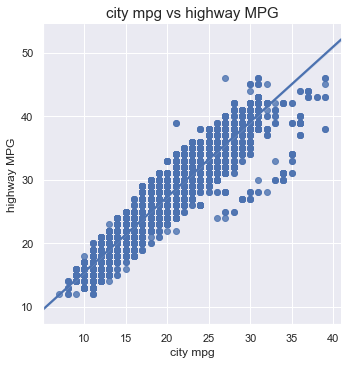

In [194]:
sns.lmplot(x = 'city mpg', y = 'highway MPG', data = data)
plt.title("city mpg vs highway MPG", fontsize = 15)
plt.show()

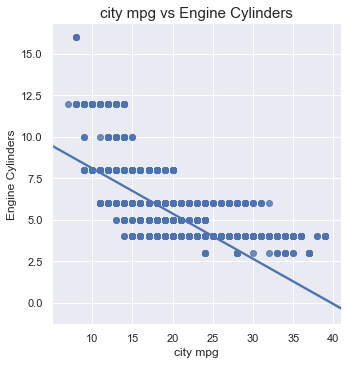

In [195]:
sns.lmplot(x = 'city mpg', y = 'Engine Cylinders', data = data)
plt.title("city mpg vs Engine Cylinders", fontsize = 15)
plt.show()

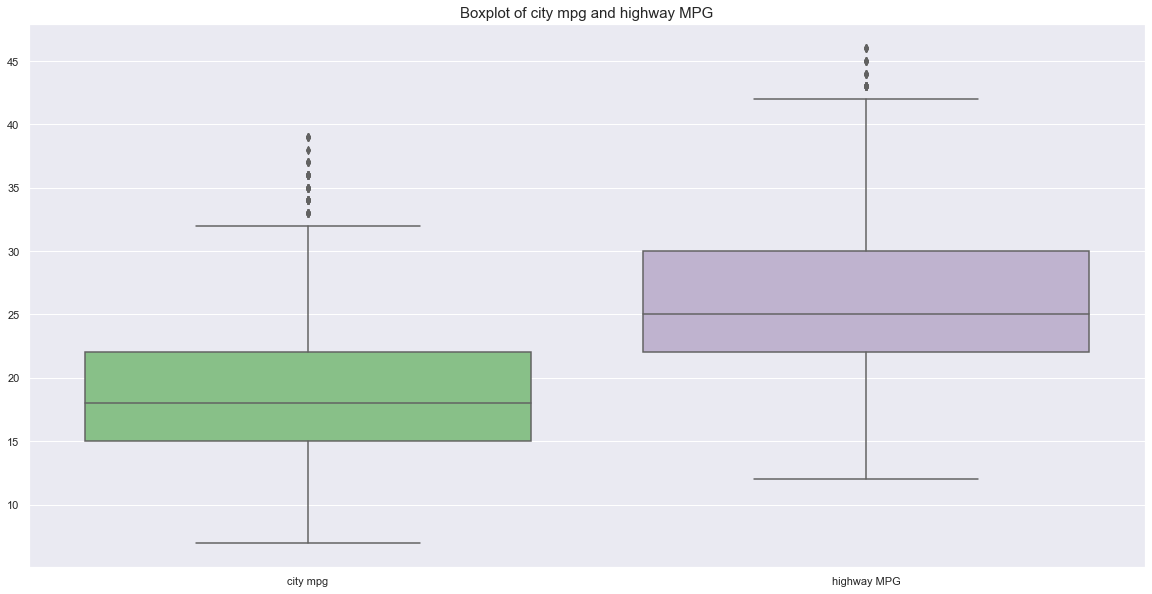

In [196]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = data[['city mpg', 'highway MPG']], palette = 'Accent')
plt.title("Boxplot of city mpg and highway MPG", fontsize = 15)
plt.show()

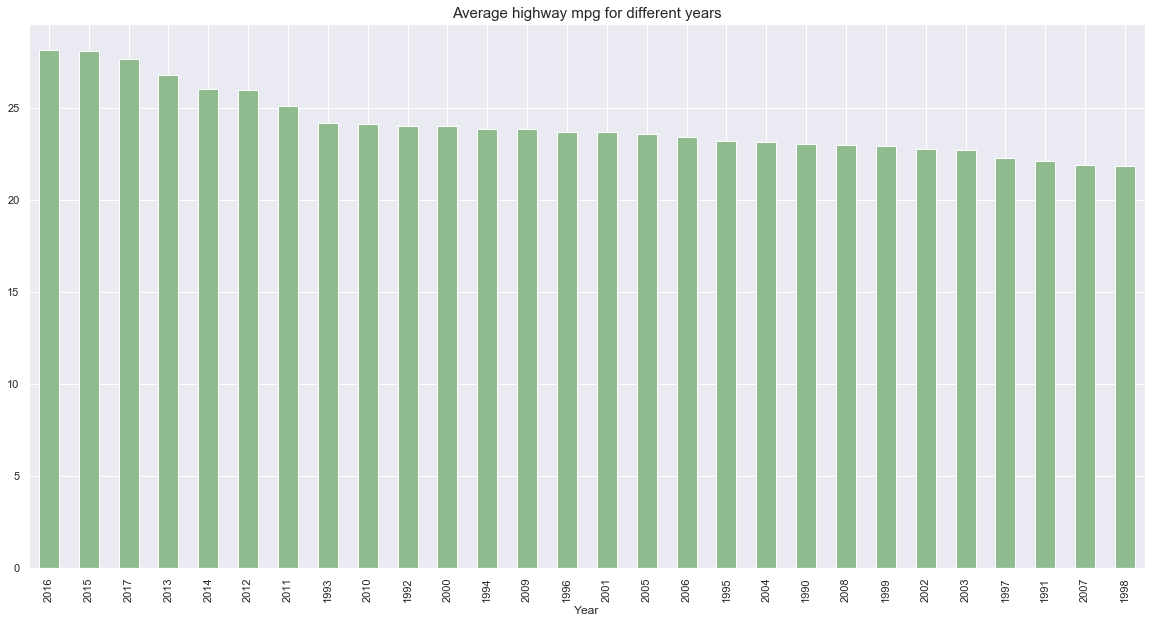

In [200]:
plt.figure(figsize = (20, 10))
data.groupby('Year').mean()['highway MPG'].sort_values(ascending = False).plot(kind = 'bar', color = 'darkseagreen')
plt.title("Average highway mpg for different years", fontsize = 15)
plt.show()

In [44]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              21
Engine Cylinders       20
Transmission Type       0
Driven_Wheels           0
Number of Doors         1
Market Category      3737
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [45]:
data['Number of Doors'].median()

4.0

In [46]:
data['Number of Doors'].fillna(4.0, inplace = True)

In [47]:
data['Number of Doors'].isnull().sum()

0

In [48]:
data['Present Year'] = 2021

In [49]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Present Year
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,2021
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,2021
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,2021
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,2021
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,2021


In [50]:
data['Years Of Manufacture'] = data['Present Year'] - data['Year']

In [51]:
data.drop(['Present Year'], inplace = True, axis = 1)

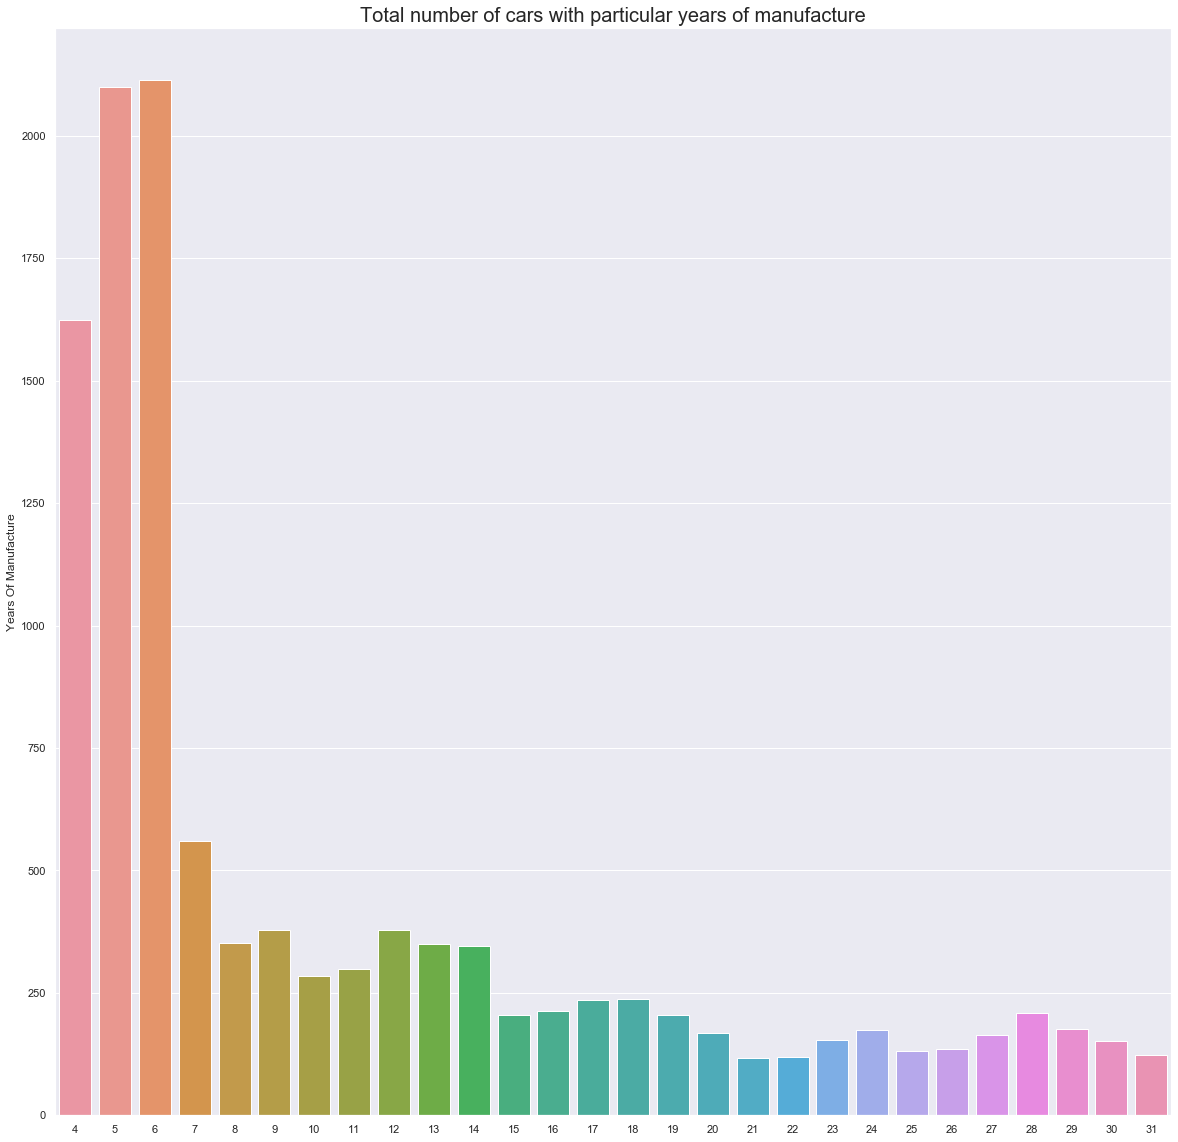

In [52]:
sns.barplot(y = data['Years Of Manufacture'].value_counts(), x = data['Years Of Manufacture'].value_counts().index)
plt.title("Total number of cars with particular years of manufacture", fontsize = 20)
plt.show()

In [53]:
data['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'flex-fuel (premium unleaded recommended/E85)',
       'natural gas', 'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [54]:
type("data['Engine Fuel Type'].mode()")

str

In [55]:
data['Engine Fuel Type'].fillna("data['Engine Fuel Type'].mode()", inplace = True)

In [56]:
data['Engine Fuel Type'].isnull().sum()

0

In [57]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                 21
Engine Cylinders          20
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

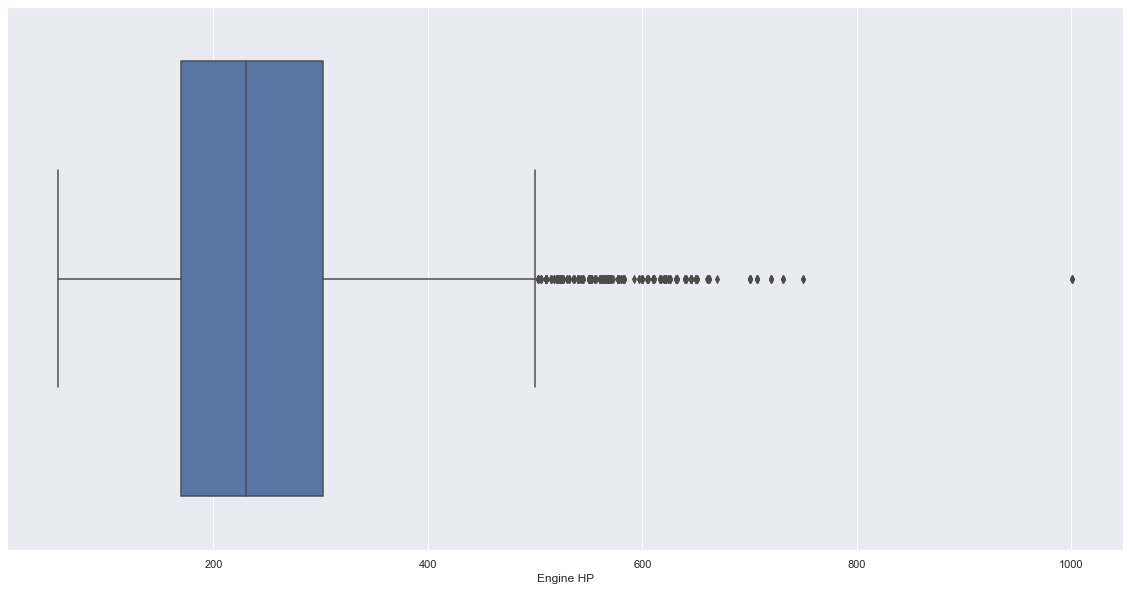

In [58]:
plt.figure(figsize = (20, 10))
sns.boxplot(data['Engine HP'])

In [59]:
data['Engine HP'].mean()

250.75316672372475

In [60]:
data['Engine HP'].median()

230.0

In [61]:
data['Engine HP'].fillna(data['Engine HP'].median(), inplace = True)

In [62]:
data['Engine HP'].isnull().sum()

0

In [63]:
data['Engine Cylinders'].unique()

array([ 6.,  4.,  5.,  8., 12., 10.,  3., nan, 16.])

In [64]:
data['Engine Cylinders'].fillna(4, inplace = True)

In [65]:
data.isnull().sum()

Make                       0
Model                      0
Year                       0
Engine Fuel Type           0
Engine HP                  0
Engine Cylinders           0
Transmission Type          0
Driven_Wheels              0
Number of Doors            0
Market Category         3737
Vehicle Size               0
Vehicle Style              0
highway MPG                0
city mpg                   0
Popularity                 0
MSRP                       0
Years Of Manufacture       0
dtype: int64

In [66]:
data.drop(['Market Category'], inplace = True, axis = 1)

In [67]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        0
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
Years Of Manufacture    0
dtype: int64

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11705 entries, 0 to 11913
Data columns (total 16 columns):
Make                    11705 non-null object
Model                   11705 non-null object
Year                    11705 non-null int64
Engine Fuel Type        11705 non-null object
Engine HP               11705 non-null float64
Engine Cylinders        11705 non-null float64
Transmission Type       11705 non-null object
Driven_Wheels           11705 non-null object
Number of Doors         11705 non-null float64
Vehicle Size            11705 non-null object
Vehicle Style           11705 non-null object
highway MPG             11705 non-null int64
city mpg                11705 non-null int64
Popularity              11705 non-null int64
MSRP                    11705 non-null int64
Years Of Manufacture    11705 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 1.5+ MB


In [69]:
data['Vehicle Size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

In [70]:
data['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [71]:
shuffled_data = shuffle(data, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [73]:
print("The size of the input train data is: {}".format(X_train.shape))
print("The size of the output train data is: {}".format(y_train.shape))
print("The size of the input test data is: {}".format(X_test.shape))
print("The size of the output test data is: {}".format(y_test.shape))

The size of the input train data is: (9364, 15)
The size of the output train data is: (9364,)
The size of the input test data is: (2341, 15)
The size of the output test data is: (2341,)


In [74]:
encoder = TargetEncoder(cols = 'Year')

In [75]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,2003,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,1997,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,1997,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,2015,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,2015,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [76]:
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )


TargetEncoder(cols=['Year'], drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [77]:
X_train['Year'] = encoder.transform(X_train['Year'])


In [78]:
X_test['Year'] = encoder.transform(X_test['Year'])

In [79]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,Alero,36784.190476,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,900,2558.326087,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,C/K 1500 Series,2558.326087,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,V8 Vantage,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,Civic,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [80]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])


In [81]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,Oldsmobile,20560.476232,36784.190476,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,Saab,2036.136859,2558.326087,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,Chevrolet,2888.416667,2558.326087,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,Aston Martin,129174.423076,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,Honda,22140.727273,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [82]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])

In [83]:
X_train["Engine Fuel Type"].unique()

array(['regular unleaded', 'premium unleaded (required)', 'diesel',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)',
       'flex-fuel (premium unleaded recommended/E85)',
       "data['Engine Fuel Type'].mode()", 'natural gas'], dtype=object)

In [84]:
X_train.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,Years Of Manufacture
1354,10810.513043,20560.476232,36784.190476,regular unleaded,140.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,30,21,26,18
896,28402.452381,2036.136859,2558.326087,regular unleaded,185.0,4.0,MANUAL,front wheel drive,2.0,Compact,2dr Hatchback,25,18,376,24
2635,28230.392090,2888.416667,2558.326087,regular unleaded,200.0,6.0,MANUAL,four wheel drive,2.0,Large,Regular Cab Pickup,18,14,1385,24
11165,197356.679487,129174.423076,46953.929157,premium unleaded (required),430.0,8.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,19,13,259,6
2554,26660.798742,22140.727273,46953.929157,regular unleaded,143.0,4.0,AUTOMATIC,front wheel drive,4.0,Compact,Sedan,39,30,2202,6


In [85]:
encoder = OneHotEncoder()
encoder.fit(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_train = encoder.transform(X_train[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])
one_hot_encoded_output_test = encoder.transform(X_test[['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']])

In [86]:
X_train = pd.concat([X_train, one_hot_encoded_output_train], axis = 1)
X_test = pd.concat([X_test, one_hot_encoded_output_test], axis = 1)

In [87]:
X_train.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)
X_test.drop(['Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], axis = 1, inplace = True)

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9364 entries, 1354 to 2564
Data columns (total 47 columns):
Make                    9364 non-null float64
Model                   9364 non-null float64
Year                    9364 non-null float64
Engine HP               9364 non-null float64
Engine Cylinders        9364 non-null float64
Number of Doors         9364 non-null float64
highway MPG             9364 non-null int64
city mpg                9364 non-null int64
Popularity              9364 non-null int64
Years Of Manufacture    9364 non-null int64
Engine Fuel Type_1      9364 non-null int64
Engine Fuel Type_2      9364 non-null int64
Engine Fuel Type_3      9364 non-null int64
Engine Fuel Type_4      9364 non-null int64
Engine Fuel Type_5      9364 non-null int64
Engine Fuel Type_6      9364 non-null int64
Engine Fuel Type_7      9364 non-null int64
Engine Fuel Type_8      9364 non-null int64
Engine Fuel Type_9      9364 non-null int64
Engine Fuel Type_10     9364 non-null int6

In [89]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [90]:
X_train_new.shape

(9364, 47)

In [91]:
error_mean_square = []
error_mean_absolute = []

In [92]:
model = LinearRegression()
model.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_predict = model.predict(X_test_new)

In [94]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [95]:
error_mean_absolute

[6737]

In [96]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [97]:
y_predict.head()

,Predicted Output
0,21152.910638
1,498.193623
2,69172.562143
3,18004.104207
4,287801.418293


In [98]:
y_test.to_frame().head()

,MSRP
8780,24660
674,2000
6569,49770
11368,20875
3548,284976


In [99]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [100]:
results.head()

,Predicted Output,MSRP
0,21152.910638,24660
1,498.193623,2000
2,69172.562143,49770
3,18004.104207,20875
4,287801.418293,284976


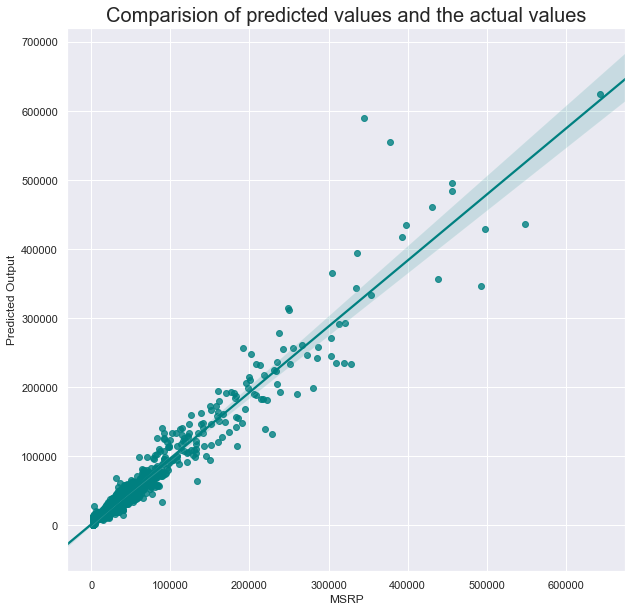

In [126]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [102]:
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

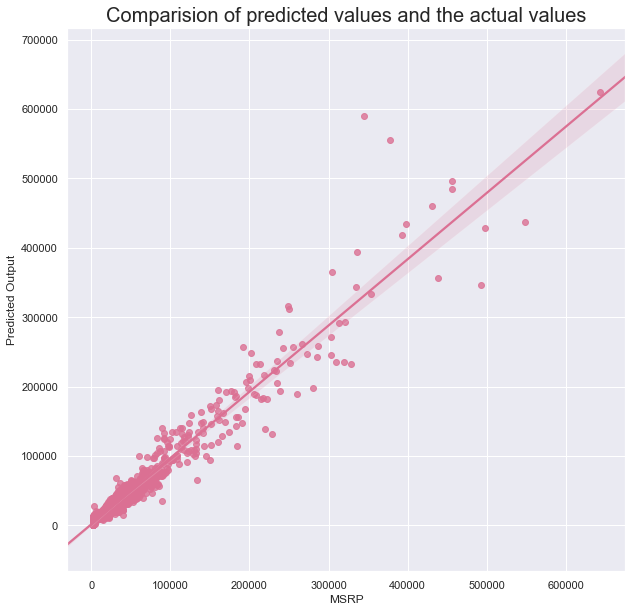

In [129]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [105]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [106]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

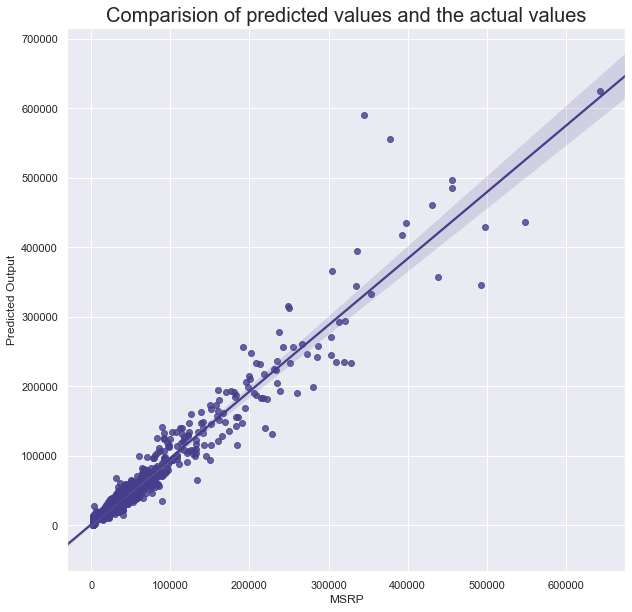

In [131]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [108]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [109]:
model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

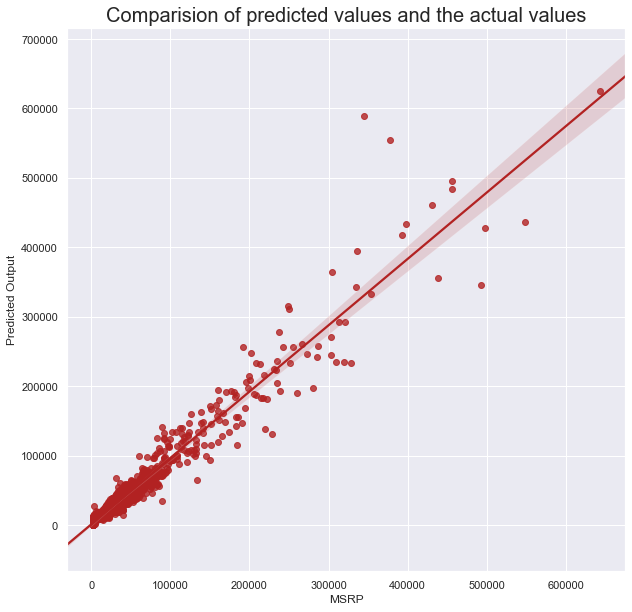

In [133]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [111]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [112]:
model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

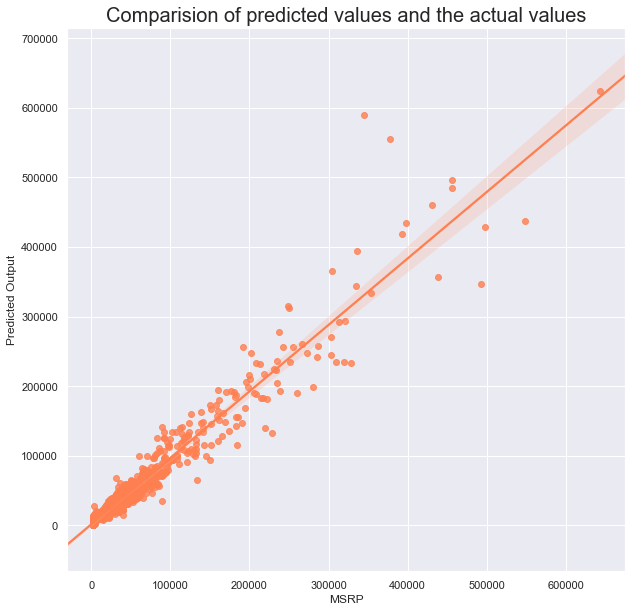

In [135]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [114]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [115]:
model = GradientBoostingRegressor()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

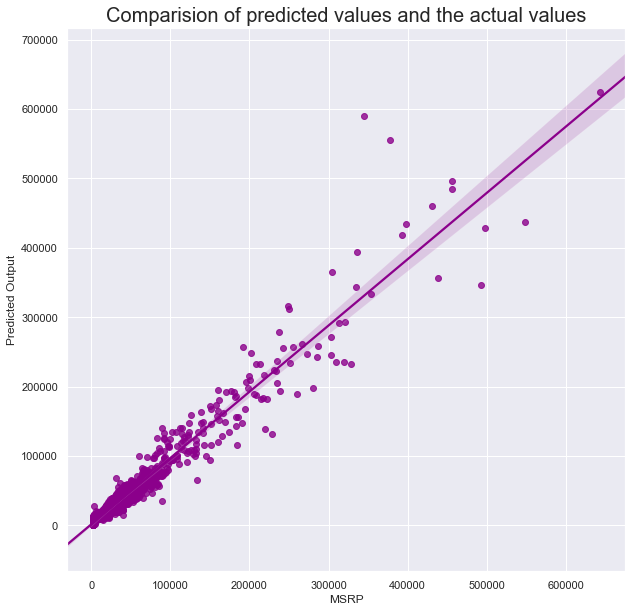

In [138]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [117]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [118]:
model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

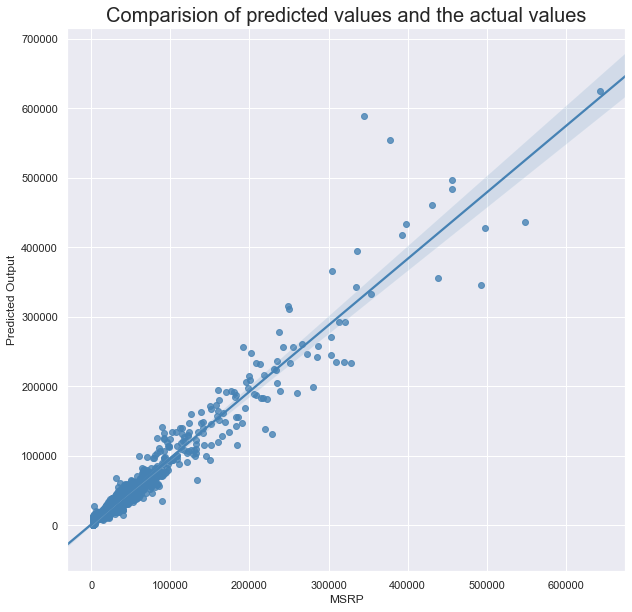

In [139]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [120]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [121]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 'Mean Absolute Error': error_mean_absolute, 'Mean Squared Error': error_mean_square}
model_dataframe = pd.DataFrame(data)

In [122]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,6737,364527989
1,Support Vector Regressor,22525,2653742304
2,K Nearest Regressor,4668,198923161
3,PLS Regression,6732,364661296
4,Decision Tree Regressor,3479,144945640
5,Gradient Boosting Regressor,4432,174281128
6,MLP Regressor,6010,159277188


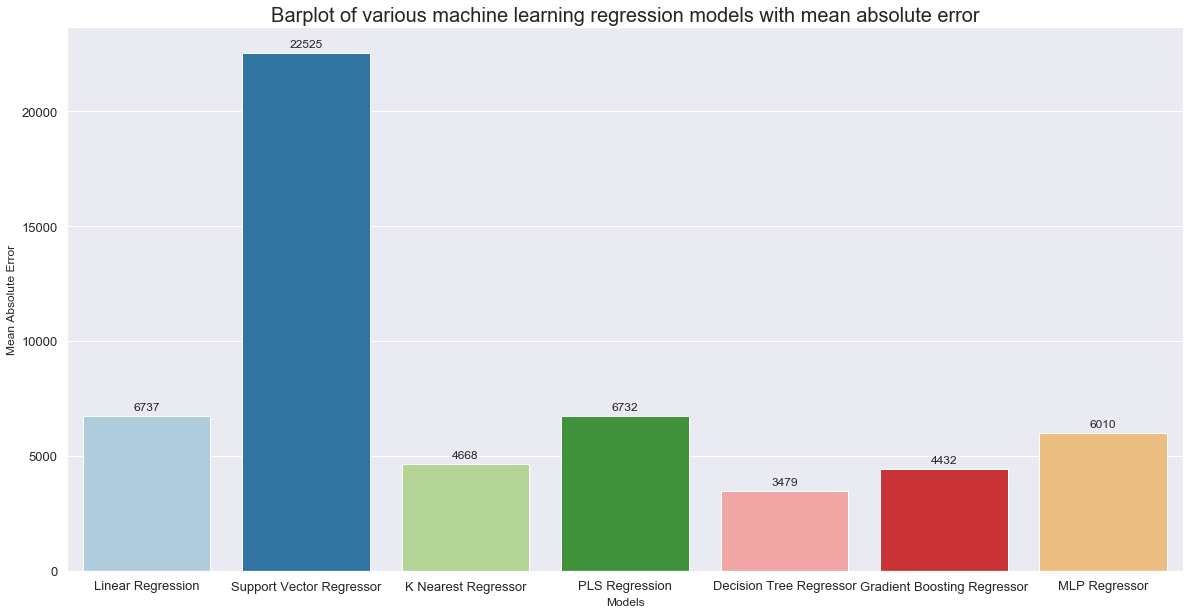

In [201]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

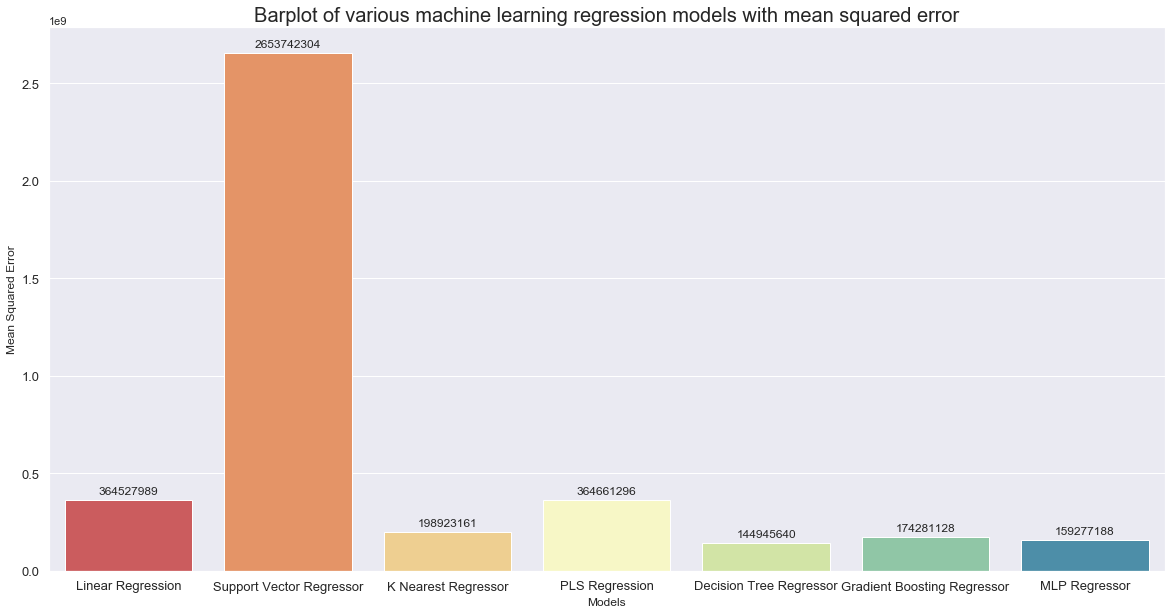

In [202]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Squared Error', palette = 'Spectral')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean squared error", fontsize = 20)
plt.show()